## EDA (Exploratory Data Analysis)
Luego del proceso de Extracción, Transformación y Carga (ETL) que culminó en la creación de dos datasets consolidado 'homicidios_cleaned.csv y lesiones_cleaned.csv' (productos de la unión de 'HECHOS' y 'VICTIMAS' de los archivos homicidios.xlsx y lesiones.xlsx), procederemos al Análisis Exploratorio de Datos (EDA) que no es más que un acto de inmersión en el compendio completo de eventos trágicos que queremos explorar y entender a fondo.

Durante el EDA, nos sumergimos en este conjunto de datos para comprender su estructura, abordar posibles outliers, identificar duplicados y gestionar valores faltantes. La riqueza de este análisis radica en la capacidad de revelar patrones, tendencias y relaciones entre variables, todo respaldado por visualizaciones pertinentes. A través de este proceso, buscamos extraer información valiosa que impulse futuras investigaciones y acciones relacionadas con la seguridad vial en la Ciudad de Buenos Aires - Argentina.

## 1. Importaciones 


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import calendar
#import folium
from func import data_cleaning
#from func import create_mysql_db
from IPython.display import Image

## 2. Cargar Datos

En la etapa inicial de nuestro proceso, abordamos los archivos originales 'homicidios.xlsx' y 'lesiones.xlsx', cada uno compuesto por dos hojas de datos: HECHOS y VICTIMAS. Durante la fase de Extracción, Transformación y Carga (ETL), optamos por fusionar estas hojas mediante un merge, generando así dos archivos resultantes: 'homicidios_cleaned.csv' y 'lesiones_cleaned.csv'. Estos archivos han sido sometidos a un proceso exhaustivo de tratamiento y limpieza de datos.

Ahora, en esta fase de análisis exploratorio, se presenta la siguiente decisión estratégica. Consideraremos la opción de concatenar los archivos limpios 'homicidios_cleaned.csv' y 'lesiones_cleaned.csv', uniendo así la información de homicidios y lesiones bajo un conjunto de datos unificado denominado 'siniestros_viales'. Esta decisión se tomará tras una evaluación más profunda de los datos, permitiéndonos obtener una perspectiva integral de los incidentes viales y sus implicaciones.

In [84]:
# Cargar datasets

homicidios_df = pd.read_csv('homicidios_cleaned.csv')
lesiones_df = pd.read_csv('lesiones_cleaned.csv')

In [85]:
homicidios_df

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,Dirección Normalizada,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
0,2016-0001,1,2016-01-01,4.0,avenida,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.475340,-34.687570,moto,auto,conductor,masculino,19.0,fatal
1,2016-0002,1,2016-01-02,1.0,gral paz,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.508775,-34.669777,auto,pasajeros,conductor,masculino,70.0,fatal
2,2016-0003,1,2016-01-03,7.0,avenida,ENTRE RIOS AV. 2034,1,-58.390403,-34.631894,moto,auto,conductor,masculino,30.0,fatal
3,2016-0004,1,2016-01-10,0.0,avenida,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,moto,NaN,conductor,masculino,18.0,fatal
4,2016-0005,1,2016-01-21,5.0,avenida,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.387183,-34.622466,moto,pasajeros,conductor,masculino,29.0,fatal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,17.0,avenida,RIESTRA AV. y MOM,7,-58.433538,-34.645616,moto,auto,pasajero_acompañante,femenino,18.0,fatal
713,2021-0094,1,2021-12-20,1.0,autopista,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,-58.467398,-34.651178,moto,auto,pasajero_acompañante,femenino,43.0,fatal
714,2021-0095,1,2021-12-30,0.0,avenida,GAONA AV. y TERRADA,11,-58.472934,-34.619847,moto,cargas,conductor,masculino,27.0,fatal
715,2021-0096,1,2021-12-15,10.0,avenida,"PERON, EVA AV. 4071",9,-58.470668,-34.650217,auto,cargas,conductor,masculino,60.0,fatal


In [86]:
lesiones_df

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
0,LC-2019-0000179,1,2019-01-01 00:00:00,9.0,NaN,14.0,-5.840891e+01,-3.455966e+01,ciclista,NaN,NaN,NaN,NaN,leve
1,LC-2019-0000053,1,2019-01-01 00:00:00,1.0,NaN,8.0,-5.844351e+01,-3.466913e+01,auto,NaN,NaN,masculino,57.0,leve
2,LC-2019-0000063,1,2019-01-01 00:00:00,2.0,NaN,8.0,-5.846834e+01,-3.467756e+01,NaN,NaN,NaN,NaN,NaN,leve
3,LC-2019-0000079,1,2019-01-01 00:00:00,2.0,NaN,7.0,-5.843742e+01,-3.464735e+01,peaton,NaN,NaN,masculino,NaN,leve
4,LC-2019-0000082,4,2019-01-01 00:00:00,4.0,NaN,3.0,-5.839822e+01,-3.460458e+01,auto,NaN,NaN,masculino,45.0,leve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27594,LC-2021-0652865,2,2021-12-31 00:00:00,19.0,avenida,9.0,-5.848833e+01,-3.464175e+01,NaN,NaN,NaN,masculino,28.0,leve
27595,LC-2021-0652865,2,2021-12-31 00:00:00,19.0,avenida,9.0,-5.848833e+01,-3.464175e+01,NaN,NaN,NaN,masculino,52.0,leve
27596,LC-2021-0652907,1,2021-12-31 00:00:00,20.0,NaN,1.0,-5.838289e+01,-3.458308e+01,NaN,NaN,NaN,masculino,23.0,leve
27597,LC-2021-0652921,1,2021-12-31 00:00:00,22.0,calle,5.0,-5.841453e+01,-3.461429e+01,moto,transporte publico,NaN,masculino,31.0,grave


## 3. Exploración de los datasets: 'homicidios_cleaned' , 'lesiones_cleaned'

In [87]:
homicidios_df.shape

(717, 15)

In [88]:
lesiones_df.shape

(27599, 14)

In [89]:
# Obtener el conteo de nulos por columna de homicidios_df
null_count = homicidios_df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (homicidios_df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                       Nulos  Porcentaje
id_siniestro               0    0.000000
nro_victimas               0    0.000000
fecha                      0    0.000000
franja_hora                1    0.139470
tipo_calle                 0    0.000000
Dirección Normalizada      9    1.255230
comuna                     0    0.000000
longitud                   0    0.000000
latitud                    0    0.000000
vehiculo_victima           9    1.255230
vehiculo_acusado          23    3.207810
rol                       11    1.534170
sexo                       6    0.836820
edad                      53    7.391911
gravedad                   0    0.000000


In [90]:
# Obtener el conteo de nulos por columna de lesiones_df
null_count = lesiones_df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (lesiones_df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                  Nulos  Porcentaje
id_siniestro          0    0.000000
nro_victimas          0    0.000000
fecha                 0    0.000000
franja_hora           9    0.032610
tipo_calle        12880   46.668358
comuna             1625    5.887894
longitud           1657    6.003841
latitud            1657    6.003841
vehiculo_victima  12823   46.461828
vehiculo_acusado  17919   64.926265
rol               27599  100.000000
sexo               2228    8.072756
edad               4471   16.199862
gravedad              0    0.000000


Debido a que no se logró la imputacion completa de todos los nulos, se opto por eliminar registros con el fin de evitar resultados sesgados, segun los porcentajes obtenidos, destacamos: 

* Análisis del DataFrame 'homicidios_df':

    La columna 'franja_hora' tiene solo un valor nulo (0.14%), lo cual no es significativo.
    Las columnas 'vehiculo_victima', 'vehiculo_acusado', 'rol', 'sexo' y 'edad' tienen algunos nulos, pero en términos porcentuales son relativamente bajos.

* Análisis del DataFrame 'lesionados_df':

    Las columnas 'comuna', 'longitud', 'latitud', 'sexo', 'edad', 'tipo_calle', 'rol', 'vehiculo_victima', 'vehiculo_acusado', todas tienen nulos pero para las cuatro (4) últimas columnas mencionadas el porcentaje es considerable superando el 45%.
Dado que ambos dataframes tienen información significativa sobre las víctimas y las circunstancias de los siniestros, sería beneficioso concatenarlos verticalmente para tener una visión más completa. Sin embargo, las columnas 'tipo_calle', 'rol', vehiculo_victima' y 'vehiculo_acusado' en función de su relevancia para los objetivos del análisis se abordarán sólo para los siniestros de gravedad fatal; es decir, de acá en adelante unificaré el conjunto de datos en el archivo 'siniestros_viales.csv' y clasificaré las muestras en dos grupos: Siniestro vial con víctimas fatales: Todo aquel hecho vial en el que resulta al menos una persona fallecida, ya sea en el acto o hasta los treinta días subsiguientes, y Siniestro vial con lesionados: Todo aquel hecho vial que registra al menos un herido, y no registra ninguna víctima fatal.

## Transformaciones Adicionales

In [97]:
# Concatenar los dos DataFrames verticalmente 

siniestros = pd.concat([homicidios_df, lesiones_df], ignore_index=True)

# Verifica el resultado
print(siniestros.shape) 

(28316, 15)


In [98]:
# Columnas para ser agregadas

# Convertimos la columna 'fecha' a tipo datetime
siniestros['fecha'] = pd.to_datetime(siniestros['fecha'], format='%Y-%m-%d', errors='coerce')




In [99]:
# Crear nuevas columnas: year, month, quarter, semester
siniestros['year'] = siniestros['fecha'].dt.year
siniestros['month'] = siniestros['fecha'].dt.month
siniestros['quarter'] = siniestros['fecha'].dt.quarter
siniestros['semester'] = siniestros['fecha'].dt.month.apply(lambda x: 1 if x <= 6 else 2)

# Nuevas columnas
new_columns_dict = {'year': 'year', 'month': 'month', 'quarter': 'quarter', 'semester': 'semester'}

In [100]:
# Convertir a entero

columns_to_int = [ 'nro_victimas','franja_hora','comuna', 'edad']

In [101]:
# Categorización de columnas

columns_to_categorize = ['franja_hora', 'tipo_calle', 'comuna', 'vehiculo_victima', 
                         'vehiculo_acusado', 'rol', 'sexo', 'edad', 'gravedad']

In [102]:
# Invocamos la función 'data_cleaning' para que haga el proceso de transformación de los datos 

siniestros_df = data_cleaning(siniestros,
                              new_columns2=new_columns_dict,  #Agregar columnas
                              convert_to_int_columns=columns_to_int, #Conversión entero  
                              categorize_columns=columns_to_categorize # Categorizar columnas
                             )

c:\Users\KAT\Documents\HENRY\PI2_DataAnalyst\Dat_Analys\Notebooks\func.py:151: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cleaned_df = cleaned_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


## 4. Exploración del Conjunto de Datos Unificados: 'siniestros_viales'


In [103]:
siniestros_df.head()

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,Dirección Normalizada,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester
0,2016-0001,1,2016-01-01,4,avenida,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.475340,-34.687570,moto,auto,conductor,masculino,19,fatal,2016.0,1.0,1.0,1
1,2016-0002,1,2016-01-02,1,gral paz,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.508775,-34.669777,auto,pasajeros,conductor,masculino,70,fatal,2016.0,1.0,1.0,1
2,2016-0003,1,2016-01-03,7,avenida,ENTRE RIOS AV. 2034,1,-58.390403,-34.631894,moto,auto,conductor,masculino,30,fatal,2016.0,1.0,1.0,1
3,2016-0004,1,2016-01-10,0,avenida,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,moto,NaN,conductor,masculino,18,fatal,2016.0,1.0,1.0,1
4,2016-0005,1,2016-01-21,5,avenida,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.387183,-34.622466,moto,pasajeros,conductor,masculino,29,fatal,2016.0,1.0,1.0,1


In [104]:
siniestros_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28316 entries, 0 to 28315
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_siniestro           28316 non-null  object        
 1   nro_victimas           28316 non-null  Int64         
 2   fecha                  717 non-null    datetime64[ns]
 3   franja_hora            28306 non-null  Int64         
 4   tipo_calle             15436 non-null  category      
 5   Dirección Normalizada  708 non-null    object        
 6   comuna                 26691 non-null  Int64         
 7   longitud               26659 non-null  float64       
 8   latitud                26659 non-null  float64       
 9   vehiculo_victima       15484 non-null  category      
 10  vehiculo_acusado       10374 non-null  category      
 11  rol                    706 non-null    category      
 12  sexo                   26082 non-null  category      
 13  e

El conjunto de datos consta de 28,316 entradas y 18 columnas. A continuación, se presenta un resumen de las columnas disponibles:

* `id_siniestro:` Identificador único del siniestro (tipo: object).

* `nro_victimas:` Número de víctimas involucradas en el siniestro (tipo: int64).

* `fecha:` Fecha del siniestro (tipo: datetime64[ns]).

* `franja_hora:` Franja horaria en la que ocurrió el siniestro (tipo: category).

* `tipo_calle:` Tipo de calle donde ocurrió el siniestro (tipo: category).

* `comuna:` Comuna donde ocurrió el siniestro (tipo: category).

* `longitud:` Longitud geográfica (tipo: object).

* `latitud:` Latitud geográfica (tipo: object).

* `vehiculo_victima:` Tipo de vehículo de la víctima (tipo: category).

* `vehiculo_acusado:` Tipo de vehículo acusado (tipo: category).

* `rol: `Rol específico (tipo: category).

* `sexo: `Género de las personas involucradas (tipo: category).

* `edad:` Edad de las personas involucradas (tipo: category).

* `gravedad:` Nivel de gravedad del siniestro (tipo: category).

* `year:` Año del hecho (tipo: int64).

* `month:` Mes del hecho (tipo: int64).

* `quarter:` Trimestre del hecho (tipo: int64).

* `semester: `Semestre del hecho (tipo: int64).

La categorización de ciertas columnas en nuestro conjunto de datos tiene varios beneficios en el proceso de análisis de datos. A continuación, se justifica la categorización de las columnas que seleccionamos:

* franja_hora: Categorizar la franja horaria puede ayudar a agrupar y analizar patrones en diferentes momentos del día, como las horas pico o las horas de menor incidencia. Facilita la identificación de tendencias temporales en la ocurrencia de siniestros viales.

* tipo_calle: La categorización del tipo de calle permite analizar la relación entre el tipo de vía y la frecuencia de siniestros. Puede revelar si ciertos tipos de calles están asociados con una mayor incidencia de incidentes viales.

* comuna: Categorizar las comunas puede simplificar el análisis geográfico y facilitar la identificación de áreas específicas con tasas de siniestralidad distintas. Ayuda a entender la distribución espacial de los incidentes en la ciudad.

* vehiculo_victima y vehiculo_acusado: Categorizar los tipos de vehículos involucrados proporciona una visión más clara de los escenarios de siniestros. Permite identificar si ciertos tipos de vehículos están más propensos a estar involucrados en accidentes y si hay patrones específicos de interacción entre vehículos.

* rol: La categorización de la columna "rol" simplifica el análisis de la relación entre roles específicos y la frecuencia de siniestros viales. Esta elección se justifica al buscar identificar patrones que indiquen si ciertos roles están asociados con una mayor incidencia de incidentes.

* sexo: La categorización del sexo facilita el análisis de la distribución de siniestros entre géneros. Puede ayudar a identificar si hay disparidades significativas en la frecuencia de incidentes viales entre diferentes grupos de género.

* edad: Categorizar la edad puede agrupar a las personas en rangos etarios, lo que simplifica el análisis demográfico. Permite identificar si ciertos grupos de edad están más afectados por los siniestros y si hay tendencias específicas en grupos de población.

* gravedad: La categorización de la gravedad permite clasificar los incidentes en diferentes niveles de seriedad. Facilita el análisis de la distribución de la gravedad de los siniestros y la identificación de patrones relacionados con lesiones o daños más severos.

# Valores Faltantes
Indagaremos un poco en nuestro conjuntos de datos para detectar valores nulos. En principio desplegaremos un mapa de calor y gráficos de barra para visualizar valores faltantes, luego haremos el tratamiento correspondiente.

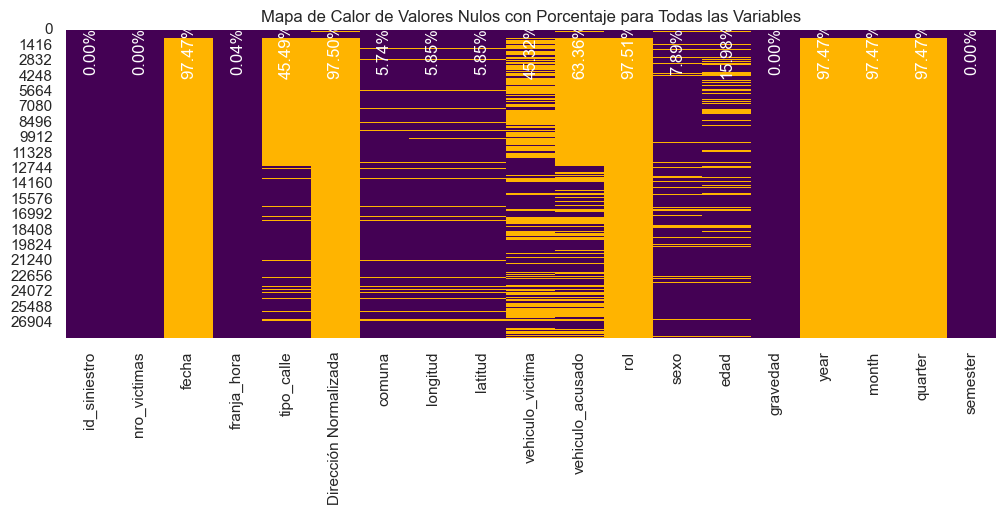

C:\Users\KAT\AppData\Local\Temp\ipykernel_11028\3057451562.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\KAT\AppData\Local\Temp\ipykernel_11028\3057451562.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


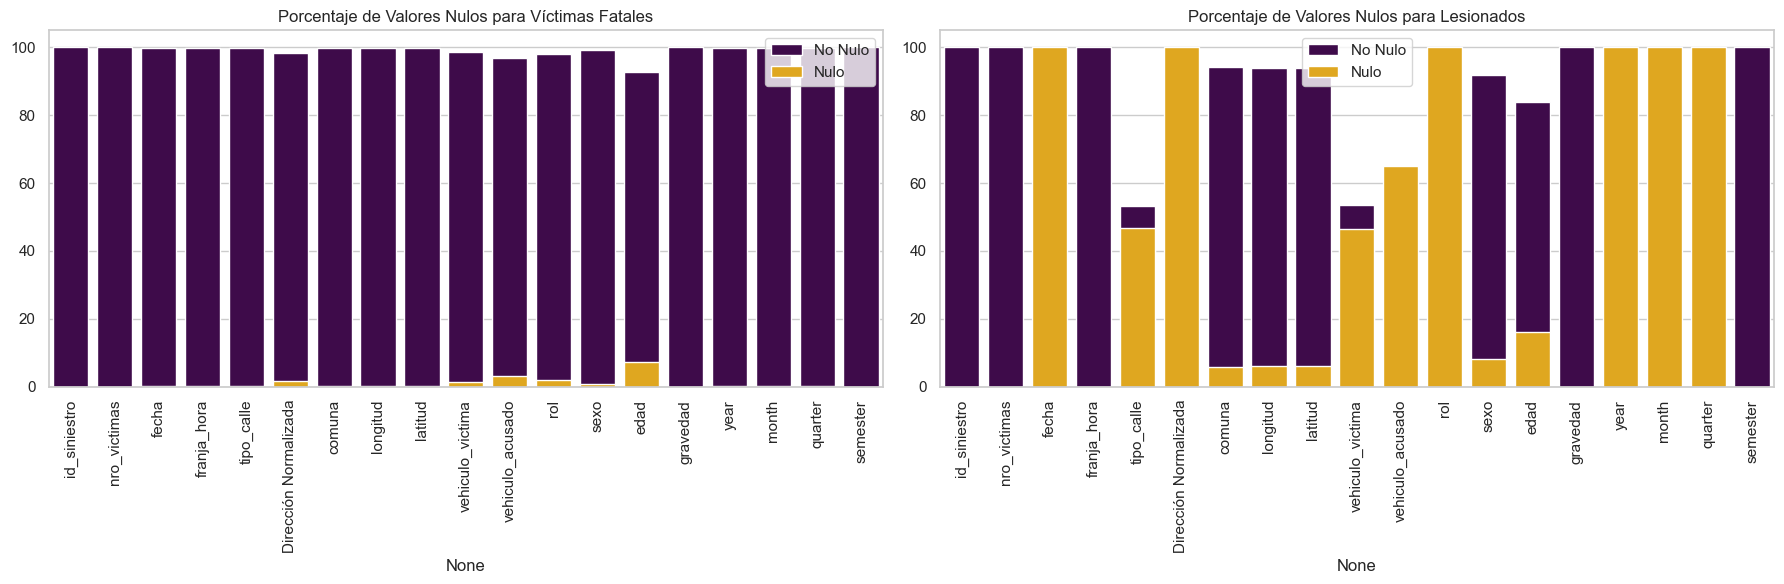

In [105]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = siniestros_df.isnull().mean() * 100

# Filtrar por víctimas fatales
fatal_df = siniestros_df[siniestros_df['gravedad'] == 'fatal']

# Filtrar por lesionados (gravedad diferente de fatal)
lesionados_df = siniestros_df[siniestros_df['gravedad'] != 'fatal']

# Calcular el porcentaje de valores nulos por columna para víctimas fatales
porcentaje_nulos_fatal = fatal_df.isnull().mean() * 100

# Calcular el porcentaje de valores nulos por columna para lesionados
porcentaje_nulos_lesionados = lesionados_df.isnull().mean() * 100

# Crear una paleta de colores personalizada
cmap_custom = sns.color_palette(['#440154', '#FFB400'])



# Crear un mapa de calor (heatmap) de valores nulos con el porcentaje
plt.figure(figsize=(12, 4))
sns.heatmap(siniestros_df.isnull(), cbar=False, cmap=cmap_custom)

# Agregar el texto con el porcentaje de nulos en cada columna
for col, porcentaje in porcentaje_nulos.items():
    plt.text(siniestros_df.columns.get_loc(col) + 0.5, 1900, f'{porcentaje:.2f}%', rotation=90,
             va='center', ha='center', color='white')

plt.title('Mapa de Calor de Valores Nulos con Porcentaje para Todas las Variables')
plt.show()



# Configurar subgráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Primer gráfico: Porcentaje de valores nulos para víctimas fatales
sns.barplot(x=porcentaje_nulos_fatal.index, y=100 - porcentaje_nulos_fatal.values, color=cmap_custom[0], label='No Nulo', ax=axes[0])
sns.barplot(x=porcentaje_nulos_fatal.index, y=porcentaje_nulos_fatal.values, color=cmap_custom[1], label='Nulo', ax=axes[0])
axes[0].set_title('Porcentaje de Valores Nulos para Víctimas Fatales')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].legend()

# Segundo gráfico: Porcentaje de valores nulos para lesionados
sns.barplot(x=porcentaje_nulos_lesionados.index, y=100 - porcentaje_nulos_lesionados.values, color=cmap_custom[0], label='No Nulo', ax=axes[1])
sns.barplot(x=porcentaje_nulos_lesionados.index, y=porcentaje_nulos_lesionados.values, color=cmap_custom[1], label='Nulo', ax=axes[1])
axes[1].set_title('Porcentaje de Valores Nulos para Lesionados')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].legend()

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

Los gráficos hablan por sí solos, con el color amarillo rápidamente podemos detectar la existencia de valores nulos. En la sección 3. Exploración del Conjunto de Datos: 'homicidios_cleaned', 'lesiones_cleaned', llevamos a cabo un análisis exhaustivo de los valores faltantes. En resumen, cuando abordemos las columnas con una cantidad significativa de valores ausentes, nos enfocaremos únicamente en los datos de siniestros viales con víctimas fatales, excluyendo así aquellos relacionados con siniestros viales

# Tratar Duplicados
A través de un gráfico de barras estaremos detectando la presencia de registros duplicados.

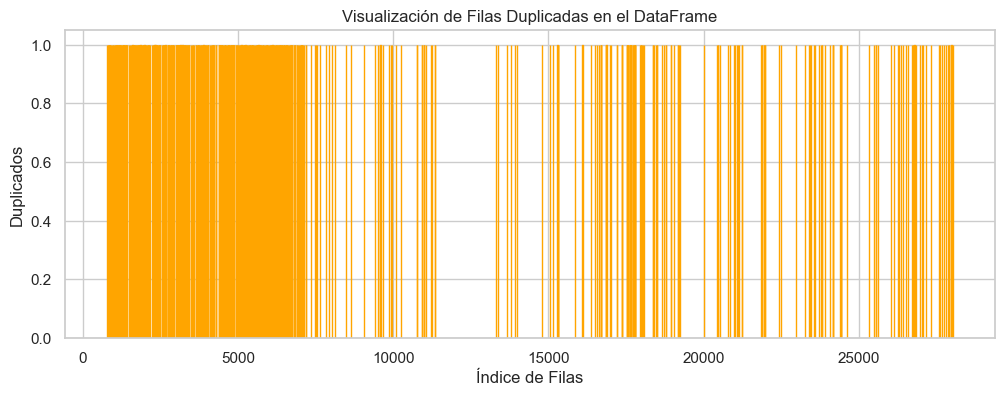

In [106]:
# Identificar filas duplicadas
filas_duplicadas = siniestros_df[siniestros_df.duplicated()]

# Crear un gráfico de barras para mostrar la cantidad de duplicados en cada fila
plt.figure(figsize=(12,4))
plt.bar(filas_duplicadas.index, height=1, color='red', edgecolor='orange', linewidth=1, label='Duplicados')
plt.title('Visualización de Filas Duplicadas en el DataFrame')
plt.xlabel('Índice de Filas')
plt.ylabel('Duplicados')
plt.show()

In [107]:
# Obtener filas duplicadas completas

filas_duplicadas = siniestros_df[siniestros_df.duplicated()]
print("\n\033[1mFilas duplicadas completas:")
filas_duplicadas


Filas duplicadas completas:


,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,Dirección Normalizada,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester
796,LC-2019-0006638,2,NaT,9,NaN,NaN,10,-58.496239,-34.636075,moto,NaN,NaN,masculino,37,leve,NaN,NaN,NaN,2
812,LC-2019-0008238,2,NaT,19,NaN,NaN,15,-58.479158,-34.590782,NaN,NaN,NaN,femenino,69,leve,NaN,NaN,NaN,2
818,LC-2019-0008388,3,NaT,20,NaN,NaN,15,-58.454242,-34.585794,NaN,NaN,NaN,femenino,<NA>,leve,NaN,NaN,NaN,2
835,LC-2019-0008860,3,NaT,6,NaN,NaN,4,-58.412835,-34.655086,transporte publico,NaN,NaN,masculino,67,leve,NaN,NaN,NaN,2
848,LC-2019-0009807,2,NaT,20,NaN,NaN,9,-58.465951,-34.658307,NaN,NaN,NaN,masculino,40,leve,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27912,LC-2021-0628972,8,NaT,16,calle,NaN,11,-58.462417,-34.610534,auto,auto,NaN,NaN,<NA>,leve,NaN,NaN,NaN,2
27913,LC-2021-0628972,8,NaT,16,calle,NaN,11,-58.462417,-34.610534,auto,auto,NaN,NaN,<NA>,leve,NaN,NaN,NaN,2
27983,LC-2021-0631292,5,NaT,12,calle,NaN,12,-58.484141,-34.552869,NaN,NaN,NaN,femenino,<NA>,grave,NaN,NaN,NaN,2
27986,LC-2021-0631295,6,NaT,12,calle,NaN,8,-58.480641,-34.679476,NaN,NaN,NaN,femenino,50,leve,NaN,NaN,NaN,2


In [108]:
# Consulta aleatoria para confirmar la duplicidad de registros

id_siniestro_consulta = "LC-2021-0633935"
consulta_resultados = siniestros_df[siniestros_df['id_siniestro'] == id_siniestro_consulta]
consulta_resultados

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,Dirección Normalizada,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester
28028,LC-2021-0633935,3,NaT,18,calle,NaN,7,-58.458854,-34.627548,peaton,camioneta,NaN,NaN,<NA>,leve,NaN,NaN,NaN,2
28029,LC-2021-0633935,3,NaT,18,calle,NaN,7,-58.458854,-34.627548,peaton,camioneta,NaN,NaN,<NA>,leve,NaN,NaN,NaN,2
28030,LC-2021-0633935,3,NaT,18,calle,NaN,7,-58.458854,-34.627548,peaton,camioneta,NaN,femenino,35,leve,NaN,NaN,NaN,2


Al examinar los registros identificados como duplicados, se evidenció que correspondían a siniestros que involucraban más de una víctima en un mismo incidente. Para validar esta observación, se seleccionó aleatoriamente un 'id_siniestro' (LC-2021-0633935) y se confirmó que no se trataba de duplicados genuinos. Con el objetivo de normalizar los datos, se implementa la estrategia de introducir una nueva columna 'id_victima' que sirviera como identificador único para cada víctima en un siniestro. En otras palabras, se asignará un número secuencial a cada víctima dentro de un incidente para diferenciarlas.

In [109]:
# Crear una nueva columna para identificar a cada víctima

siniestros_df['id_victima'] = siniestros_df.groupby('id_siniestro').cumcount() + 1
print("\033[1mDataFrame con nueva columna 'id_victima':")
siniestros_df.head()

DataFrame con nueva columna 'id_victima':


,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,Dirección Normalizada,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester,id_victima
0,2016-0001,1,2016-01-01,4,avenida,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.475340,-34.687570,moto,auto,conductor,masculino,19,fatal,2016.0,1.0,1.0,1,1
1,2016-0002,1,2016-01-02,1,gral paz,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.508775,-34.669777,auto,pasajeros,conductor,masculino,70,fatal,2016.0,1.0,1.0,1,1
2,2016-0003,1,2016-01-03,7,avenida,ENTRE RIOS AV. 2034,1,-58.390403,-34.631894,moto,auto,conductor,masculino,30,fatal,2016.0,1.0,1.0,1,1
3,2016-0004,1,2016-01-10,0,avenida,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,moto,NaN,conductor,masculino,18,fatal,2016.0,1.0,1.0,1,1
4,2016-0005,1,2016-01-21,5,avenida,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.387183,-34.622466,moto,pasajeros,conductor,masculino,29,fatal,2016.0,1.0,1.0,1,1


In [110]:
# Conteo de duplicados para verificar nuevamente

duplicados_count = siniestros_df.duplicated().sum()
print(f"Total de registros duplicados en siniestro_df: {duplicados_count}")

Total de registros duplicados en siniestro_df: 0


# Almacenamiento de los datos 

In [24]:
# Almacenar el DataFrame unificado

siniestros_df.to_csv('siniestros_viales.csv', index=False)


In [111]:
siniestros_df[['gravedad']]

,gravedad
0,fatal
1,fatal
2,fatal
3,fatal
4,fatal
...,...
28311,leve
28312,leve
28313,leve
28314,grave


# Análisis descriptivo 

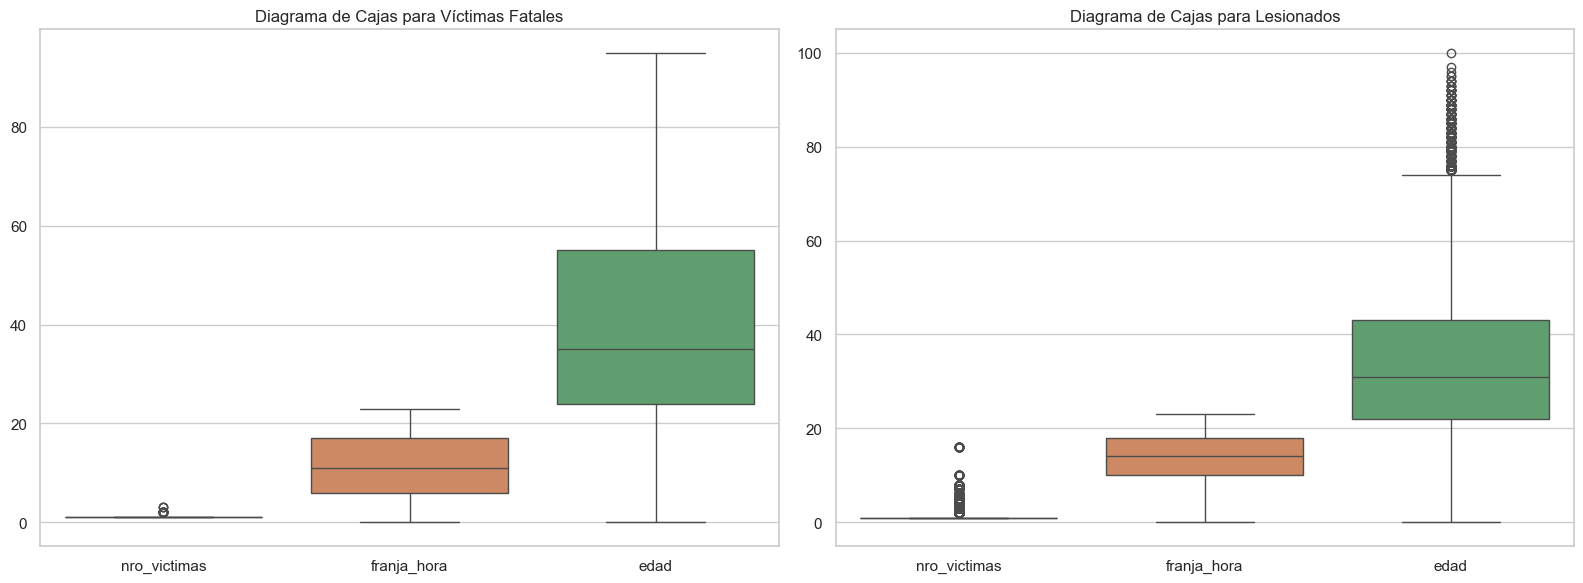

In [112]:
# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Filtrar por gravedad igual a 'fatal'
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal'].drop(columns=['comuna', 'id_victima'])

# Filtrar por gravedad diferente de 'fatal'
siniestros_lesionados = siniestros_df[siniestros_df['gravedad'] != 'fatal'].drop(columns=['comuna', 'id_victima'])

# Seleccionar columnas numéricas para el boxplot
columns_of_interest = ['nro_victimas', 'franja_hora', 'edad']

# Llenar los valores nulos con ceros para Víctimas Fatales
siniestros_fatal_filled = siniestros_fatal[columns_of_interest].fillna(0)

# Llenar los valores nulos con ceros para Lesionados
siniestros_lesionados_filled = siniestros_lesionados[columns_of_interest].fillna(0)

# Configurar la disposición de subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Crear un diagrama de cajas para Víctimas Fatales
sns.boxplot(data=siniestros_fatal_filled, ax=axes[0])
axes[0].set_title('Diagrama de Cajas para Víctimas Fatales')

# Crear un diagrama de cajas para Lesionados
sns.boxplot(data=siniestros_lesionados_filled, ax=axes[1])
axes[1].set_title('Diagrama de Cajas para Lesionados')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [23]:
# Filtrar por gravedad igual a 'fatal'
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal'].drop(columns=['comuna', 'id_victima'])

# Filtrar por gravedad diferente de 'fatal'
siniestros_lesionados = siniestros_df[siniestros_df['gravedad'] != 'fatal'].drop(columns=['comuna', 'id_victima'])

# Descripción estadística para Víctimas Fatales
describe_fatal = siniestros_fatal.describe()

# Descripción estadística para Lesionados
describe_lesionados = siniestros_lesionados.describe()

# Imprimir los resultados con negrita (en un entorno compatible)
print("\033[1mEstadísticas para Víctimas Fatales:\033[0m")  # Esto funciona en algunos entornos
print(describe_fatal)

print("\n\033[1mEstadísticas para Lesionados:\033[0m")
print(describe_lesionados)

Estadísticas para Víctimas Fatales:
       nro_victimas                          fecha  franja_hora    longitud  \
count         719.0                            717        718.0  718.000000   
mean       1.061196  2018-09-09 01:24:21.087866112    11.559889  -58.441728   
min             1.0            2016-01-01 00:00:00          0.0  -58.529942   
25%             1.0            2017-04-01 00:00:00          6.0  -58.477383   
50%             1.0            2018-07-07 00:00:00         11.0  -58.444567   
75%             1.0            2019-12-18 00:00:00         17.0  -58.401841   
max             3.0            2021-12-30 00:00:00         23.0  -58.356082   
std        0.256686                            NaN     6.691543    0.046490   

          latitud       edad         year       month     quarter    semester  
count  718.000000      666.0   717.000000  717.000000  717.000000  719.000000  
mean   -34.619622  42.145646  2018.174338    6.688982    2.549512    1.517385  
min    -34.7

# Estadísticas para Víctimas Fatales:

* nro_victimas: La cantidad promedio de víctimas fatales por siniestro es aproximadamente 1.06, con un valor máximo de 3 víctimas en un siniestro.variabilidad.

* franja_hora: La franja horaria promedio en la que ocurren los siniestros fatales es alrededor de las 11:33 a.m.

* edad: La edad promedio de las víctimas fatales es de aproximadamente 42 años, con una edad mínima de 1 año y una edad máxima de 95 años.

* year: Los siniestros fatales tienen un promedio de alrededor de 1,061 ocurrencias por año. Nuestro conjunto de datos comprende desde el año 2016 al 2021.

* month: La mayoría de los siniestros fatales parecen ocurrir con mayor frecuencia en los meses de junio y julio.

* quarter: La mayoría de los siniestros fatales se distribuyen en el segundo y tercer trimestre del año.

* semester: La mayoría de los siniestros fatales se distribuyen equitativamente entre el primer y segundo semestre del año.

Estadísticas para Lesionados:

* nro_victimas: La cantidad promedio de víctimas lesionadas por siniestro es aproximadamente 1.42, con un valor máximo de 16 víctimas en un siniestro.

* franja_hora: La franja horaria promedio en la que ocurren los siniestros con lesionados es alrededor de las 1:33 p.m.

* edad: La edad promedio de las víctimas lesionadas es de aproximadamente 37.73 años, con una edad mínima de 0 años y una edad máxima de 100 años.

* year: Los siniestros con lesionados tienen un promedio de alrededor de 27,597 ocurrencias por año. Nuestro conjunto de datos comprende desde el año 2019 al 2021.

* month: La mayoría de los siniestros con lesionados parecen ocurrir con mayor frecuencia en los meses de junio y julio.

* quarter: La mayoría de los siniestros con lesionados se distribuyen en el segundo y tercer trimestre del año.

* semester: La mayoría de los siniestros con lesionados se distribuyen equitativamente entre el primer y segundo semestre del año.

# Análisis General:

En términos generales, observamos que los siniestros con víctimas fatales predomina una única víctima fatal, aunque se registran casos excepcionales con múltiples víctimas mortales. La mayoría de los siniestros fatales ocurre alrededor de las 11:30 a.m. La edad promedio es relativamente alta, abarcando un rango amplio de edades siendo la media 42 años. Se observa tambien incremento en la frecuencia de siniestros fatales en los meses de junio y julio y distribución equitativa a lo largo del año.

En contraste, los siniestros con lesionados presentan una mayor variabilidad en el número de víctimas, con casos que involucran hasta 16 personas afectadas. Estos siniestros, tienden a ocurrir más tarde, alrededor de la 1:30 p.m.Edad promedio de las víctimas lesionadas es menor en comparación con las víctimas fatales, indicando una distribución más amplia de edades afectadas, se distribuyen alrededor de los 38 años. En cuanto a la temporalidad es similar a los siniestros fatales, se observa un aumento en la frecuencia en los meses de junio y julio.

La relación general entre estas variables sugiere que los siniestros fatales tienden a ser menos numerosos pero más consistentes en términos de víctimas y horario de ocurrencia, mientras que los siniestros con lesionados muestran mayor variabilidad en estas métricas. Este análisis proporciona una visión detallada de la dinámica de los siniestros viales en Buenos Aires y puede ser clave para desarrollar estrategias de prevención y respuesta efectivas.

# Análisis de Distribuciones Univariables
En este paso, nos centramos en comprender la forma y la naturaleza de la distribución de cada variable individual en nuestro conjunto de datos. Esto implica examinar la frecuencia y la variabilidad de los valores en cada columna. Cada gráfico proporciona información valiosa sobre cómo se distribuyen los datos y puede orientar decisiones sobre manipulaciones adicionales, como transformaciones o segmentación de datos, según sea necesario.

# Siniestros por año:

Analizaremos la tendencia temporal de los siniestros (fatales y lesionados), para ello hemos recurrido a realizar gráficos de línea separando el conjunto de datos por la gravedad.

Al visualizar la tendencia de los accidentes, se destaca una disminución considerable en la cantidad de incidentes no fatales desde el 2019 hasta el 2020. No obstante, esta tendencia positiva dio un giro inesperado en el 2021, cuando los accidentes no fatales volvieron a experimentar un aumento. Estimo que este comportamiento vino dado por época en pandemia.

In [113]:
siniestros_lesionados['month'].unique

<bound method Series.unique of 717     NaN
718     NaN
719     NaN
720     NaN
721     NaN
         ..
28311   NaN
28312   NaN
28313   NaN
28314   NaN
28315   NaN
Name: month, Length: 27597, dtype: float64>

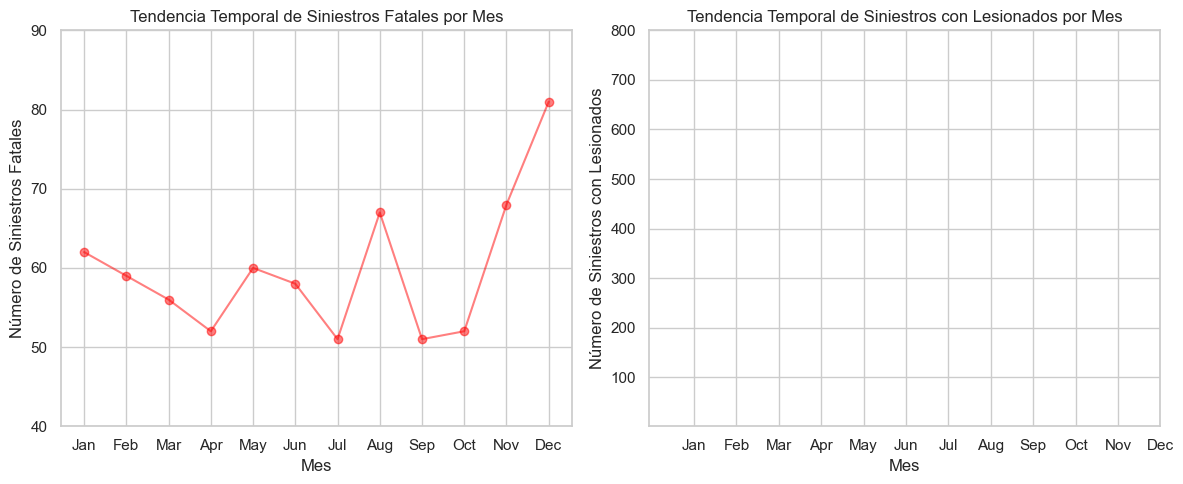

In [117]:
# Filtrar por gravedad igual a 'fatal' (víctimas fatales)
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal']

# Filtrar por gravedad diferente de 'fatal' (víctimas lesionadas)
siniestros_lesionados = siniestros_df[siniestros_df['gravedad'] != 'fatal']

# Agrupar por mes y contar el número de siniestros en cada mes
siniestros_fatal_por_mes = siniestros_fatal.groupby(siniestros_fatal['month']).size()
siniestros_lesionados_por_mes = siniestros_lesionados.groupby(siniestros_lesionados['month']).size()

# Crear dos gráficos diferentes
plt.figure(figsize=(12, 5))

# Primer gráfico para siniestros fatales por mes
plt.subplot(1, 2, 1)
plt.plot(siniestros_fatal_por_mes.index, siniestros_fatal_por_mes, label='Fatal', marker='o', alpha=0.5, color='red')
plt.title('Tendencia Temporal de Siniestros Fatales por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Siniestros Fatales')
plt.xticks(range(1, 13), calendar.month_abbr[1:])  # Usar abreviaturas de meses
plt.ylim(40, 90)  # Ajustar el rango del eje y
plt.grid(True)

# Segundo gráfico para siniestros con víctimas lesionadas por mes
plt.subplot(1, 2, 2)
plt.plot(siniestros_lesionados_por_mes.index, siniestros_lesionados_por_mes, label='Lesionados', marker='o', alpha=0.5, color='pink')
plt.title('Tendencia Temporal de Siniestros con Lesionados por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Siniestros con Lesionados')
plt.xticks(range(1, 13), calendar.month_abbr[1:])  # Usar abreviaturas de meses
plt.ylim(1, 800)  # Ajustar el rango del eje y
plt.grid(True)

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()

# Siniestros por mes:

Se analizan los siniestros por mes en pro de identificar patrones estacionales en la frecuencia de los siniestros.

En los siniestros fatales, se observa que diciembre, noviembre y agosto concentran la mayor cantidad de sucesos mortales, en contraste con septiembre y octubre. Miestras que , para el caso de los los lesionados, se destacan octubre, marzo y diciembre como los meses con la mayor cantidad de incidentes, mientras que mayo y abril registran la menor incidencia.

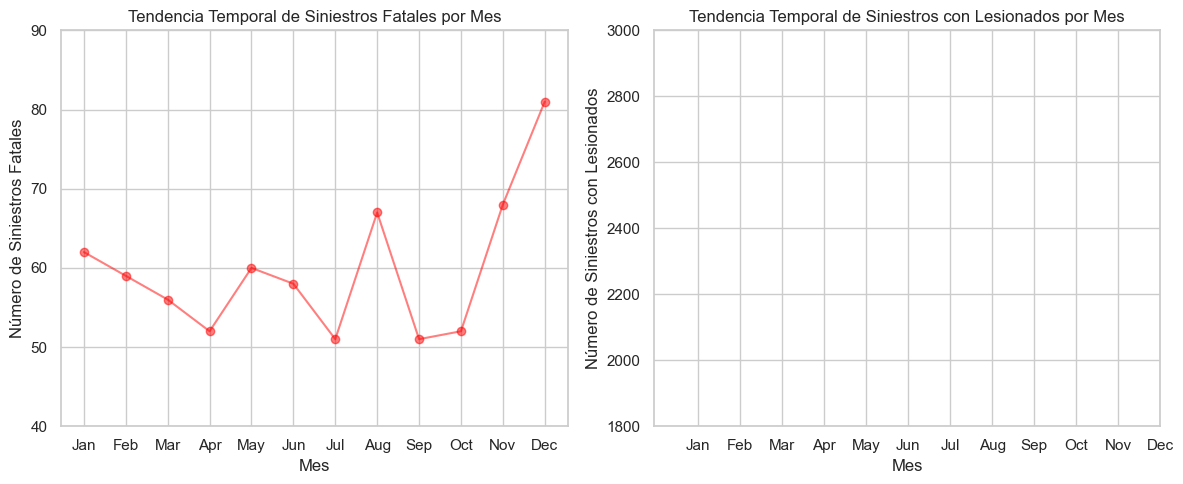

In [119]:
# Filtrar por gravedad igual a 'fatal' (víctimas fatales)
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal']

# Filtrar por gravedad diferente de 'fatal' (víctimas lesionadas)
siniestros_lesionados = siniestros_df[siniestros_df['gravedad'] != 'fatal']

# Agrupar por mes y contar el número de siniestros en cada mes
siniestros_fatal_por_mes = siniestros_fatal.groupby(siniestros_fatal['month']).size()
siniestros_lesionados_por_mes = siniestros_lesionados.groupby('month').size()

# Crear dos gráficos diferentes
plt.figure(figsize=(12, 5))

# Primer gráfico para siniestros fatales por mes
plt.subplot(1, 2, 1)
plt.plot(siniestros_fatal_por_mes.index, siniestros_fatal_por_mes, label='Fatal', marker='o', alpha=0.5, color='red')
plt.title('Tendencia Temporal de Siniestros Fatales por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Siniestros Fatales')
plt.xticks(range(1, 13), calendar.month_abbr[1:])  # Usar abreviaturas de meses
plt.ylim(40, 90)  # Ajustar el rango del eje y
plt.grid(True)

# Segundo gráfico para siniestros con víctimas lesionadas por mes
plt.subplot(1, 2, 2)
plt.plot(siniestros_lesionados_por_mes.index, siniestros_lesionados_por_mes, label='Lesionados', marker='o', alpha=0.5, color='blue')
plt.title('Tendencia Temporal de Siniestros con Lesionados por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Siniestros con Lesionados')
plt.xticks(range(1, 13), calendar.month_abbr[1:])  # Usar abreviaturas de meses
plt.ylim(1800, 3000)  # Ajustar el rango del eje y
plt.grid(True)

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()

In [50]:
siniestros_lesionados_por_mes = siniestros_lesionados.groupby('month').size()
siniestros_lesionados_por_mes

Series([], dtype: int64)

# Siniestros por Franja Horaria:

En siniestros de lesionados, emerge un patrón discernible en la distribución horaria. Se percibe un incremento constante desde las 4 de la mañana hasta las 6 de la tarde, alcanzando su punto álgido durante este periodo. Posterior a las 6 de la tarde, el número de accidentes experimenta una disminución gradual hora tras hora hasta el cierre del día. Notablemente, las horas que exhiben la mayor concentración de accidentes no fatales abarcan desde las 12 pm hasta las 5 pm.

En contraste, para los accidentes fatales, la mayor incidencia se concentra entre las 6 y 7 de la mañana. En las horas menos propensas a accidentes fatales, destacan las 2 de la mañana y la 1 de la tarde. Este análisis temporal proporciona información crucial para comprender los momentos críticos del día y puede orientar estrategias de prevención específicas en función de la gravedad de los siniestros.

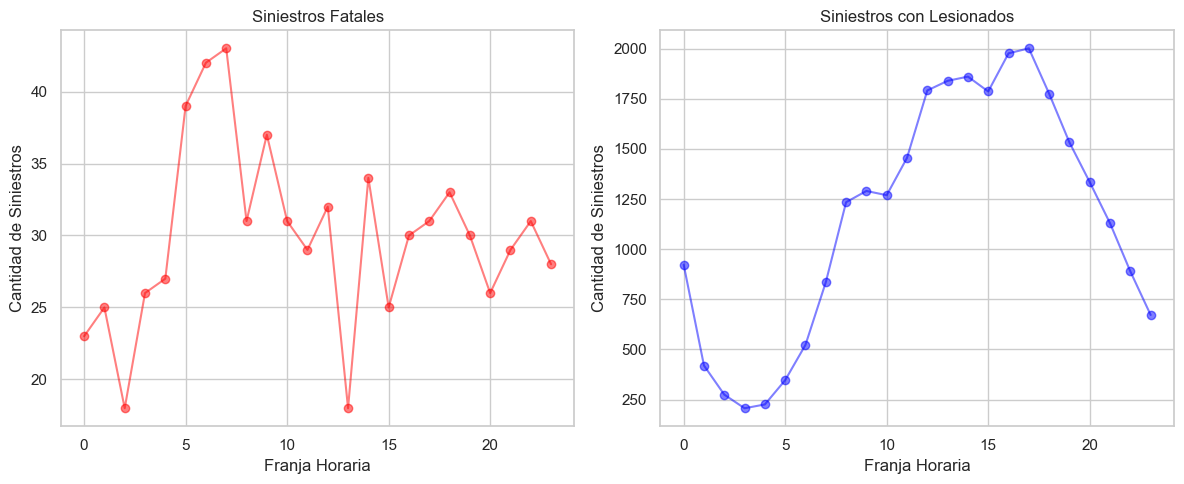

In [120]:
# Filtrar por gravedad igual a 'fatal' (víctimas fatales)
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal'].dropna(subset=['franja_hora'])

# Filtrar por gravedad diferente de 'fatal' (víctimas lesionadas)
siniestros_lesionados = siniestros_df[siniestros_df['gravedad'] != 'fatal'].dropna(subset=['franja_hora'])

# Obtener la lista completa de franjas horarias (unión de ambas categorías)
franjas_horarias = np.union1d(siniestros_fatal['franja_hora'].unique(), siniestros_lesionados['franja_hora'].unique())

# Agrupar y contar la cantidad de siniestros en cada categoría para cada franja horaria
fatal_por_horario = siniestros_fatal.groupby('franja_hora').size().reindex(franjas_horarias, fill_value=0)
lesionados_por_horario = siniestros_lesionados.groupby('franja_hora').size().reindex(franjas_horarias, fill_value=0)

# Configurar la figura y los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graficar la línea para siniestros fatales con menor intensidad de color
axes[0].plot(franjas_horarias, fatal_por_horario, label='Fatal', color='red', alpha=0.5, marker='o')
axes[0].set_title('Siniestros Fatales')
axes[0].set_xlabel('Franja Horaria')
axes[0].set_ylabel('Cantidad de Siniestros')
axes[0].grid(True)

# Graficar la línea para siniestros con víctimas lesionadas con menor intensidad de color
axes[1].plot(franjas_horarias, lesionados_por_horario, label='Lesionados', color='blue', alpha=0.5, marker='o')
axes[1].set_title('Siniestros con Lesionados')
axes[1].set_xlabel('Franja Horaria')
axes[1].set_ylabel('Cantidad de Siniestros')
axes[1].grid(True)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()


# Siniestros por Tipo de Calle:

Este análisis permite analizar la relación entre el tipo de vía y la frecuencia de siniestros. En el conjunto de datos se hicieron presente los siguientes valores: autopista, avenida, calle y gral paz. Ésta última es una autopista que dicho por los mismos entes gubernamentales prefieren el análisis por separado por comportamientos peculiares.

La mayoría de los siniestros, tanto fatales como no fatales, tienen lugar predominantemente en avenidas, seguidas por calles y autopistas en menor medida. No obstante, al analizar específicamente los accidentes fatales, las avenidas destacan de manera significativa, representando el 61% de los casos. En este contexto, las proporciones entre avenidas y autopistas son casi equivalentes. En el caso de los siniestros de lesionado, no voy a detenerme en el análisis ya que pudiera ser sesgado recordando que, el 46.66% de los datos en ésta variable eran nulos.

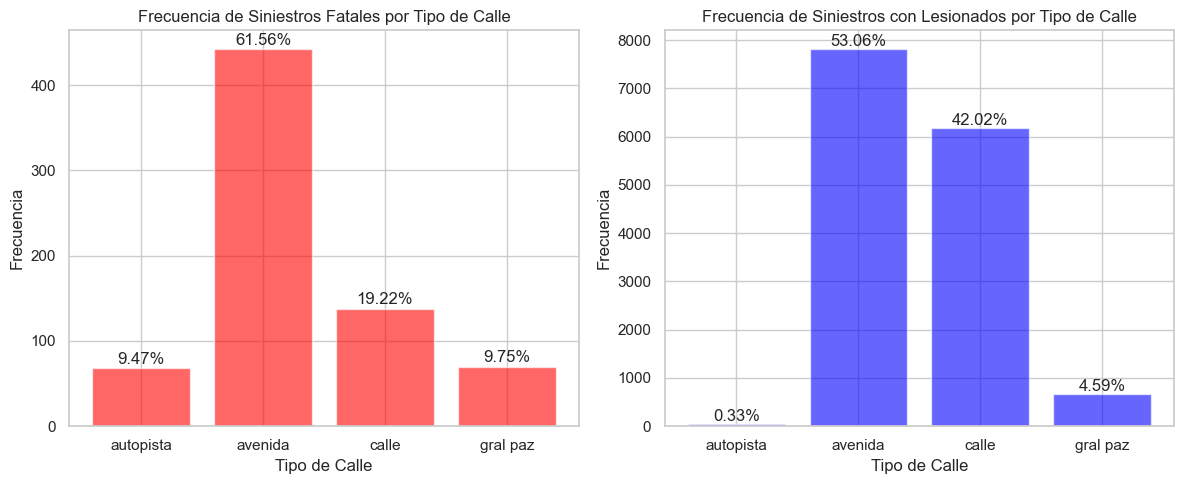

In [30]:
# Filtrar por gravedad igual a 'fatal' (víctimas fatales)
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal']

# Filtrar por gravedad diferente de 'fatal' (víctimas lesionadas)
siniestros_lesionados = siniestros_df[siniestros_df['gravedad'] != 'fatal']

# Obtener la distribución de siniestros por tipo de calle
tipo_calle_fatal = siniestros_fatal['tipo_calle'].value_counts()
tipo_calle_lesionados = siniestros_lesionados['tipo_calle'].value_counts()

# Obtener la lista de tipos de calle
tipos_calle = np.unique(siniestros_df['tipo_calle'].dropna())

# Configurar la figura y los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Crear el gráfico de barras agrupado para siniestros fatales con frecuencia y porcentaje
frecuencia_fatal = tipo_calle_fatal.reindex(tipos_calle, fill_value=0)
porcentaje_fatal = frecuencia_fatal / frecuencia_fatal.sum() * 100
axes[0].bar(tipos_calle, frecuencia_fatal, color='red', alpha=0.6)
for i, v in enumerate(frecuencia_fatal):
    axes[0].text(i, v + 2, f'{porcentaje_fatal.iloc[i]:.2f}%', ha='center', va='bottom')
axes[0].set_title('Frecuencia de Siniestros Fatales por Tipo de Calle')
axes[0].set_xlabel('Tipo de Calle')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True)

# Crear el gráfico de barras agrupado para siniestros con víctimas lesionadas con frecuencia y porcentaje
frecuencia_lesionados = tipo_calle_lesionados.reindex(tipos_calle, fill_value=0)
porcentaje_lesionados = frecuencia_lesionados / frecuencia_lesionados.sum() * 100
axes[1].bar(tipos_calle, frecuencia_lesionados, color='blue', alpha=0.6)
for i, v in enumerate(frecuencia_lesionados):
    axes[1].text(i, v + 2, f'{porcentaje_lesionados.iloc[i]:.2f}%', ha='center', va='bottom')
axes[1].set_title('Frecuencia de Siniestros con Lesionados por Tipo de Calle')
axes[1].set_xlabel('Tipo de Calle')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()


# Siniestros por Comuna:

Esta visulización nos puede simplificar el análisis geográfico y facilitar la identificación de áreas específicas con tasas de siniestralidad distintas. En los accidentes fatales notamos que la mayor cantidad de siniestros ocurren en las comunas: 1, 4 y 9 mientras que para los siniestros con lesionados tenemos la 1, 15, 4. Se indaga un mismo patrón en la comuna 4, interesante para análisis más profundo.

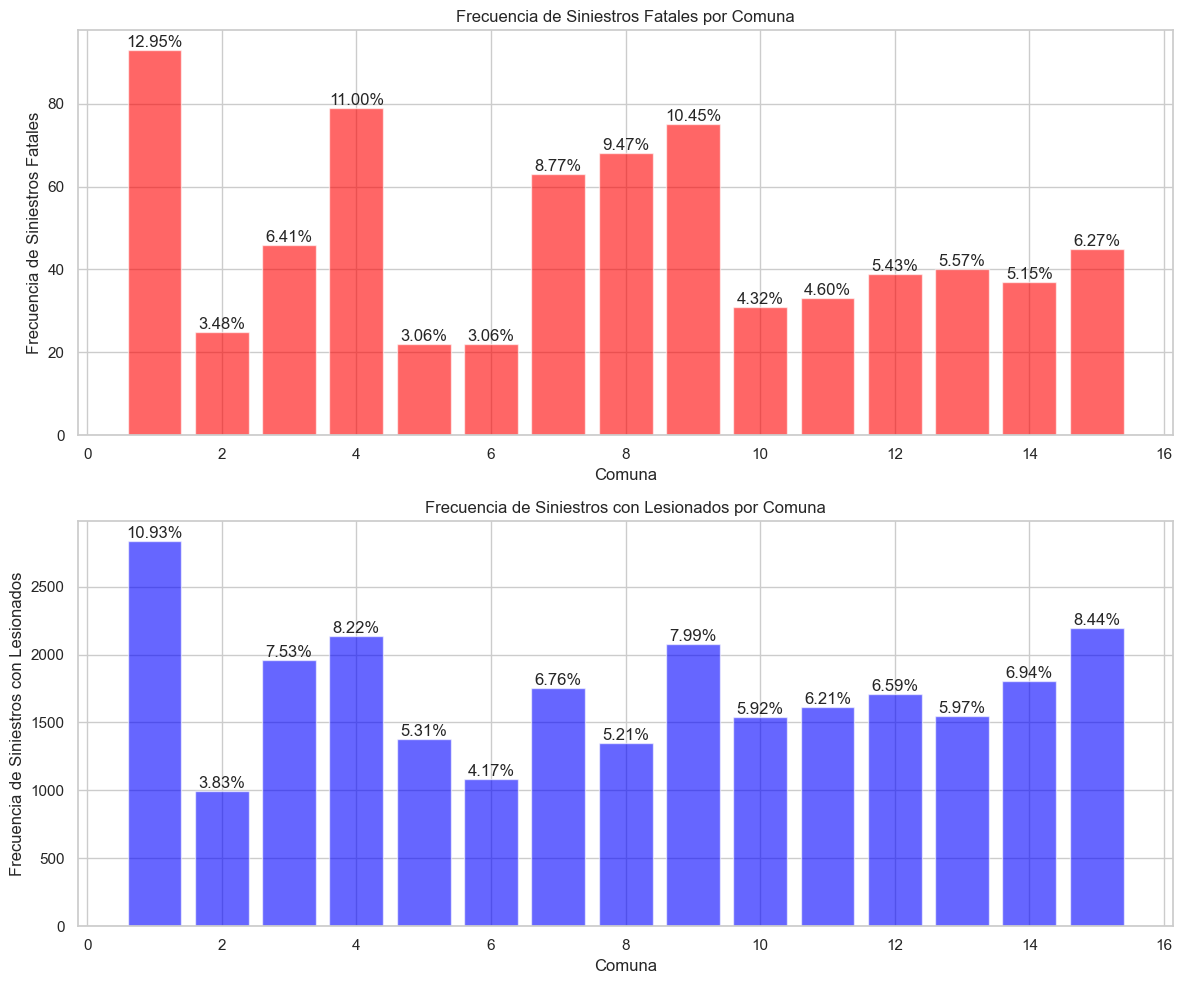

In [31]:
# Filtrar por gravedad igual a 'fatal' (víctimas fatales) y comuna no nula
siniestros_fatal = siniestros_df[(siniestros_df['gravedad'] == 'fatal') & siniestros_df['comuna'].notnull()]

# Filtrar por gravedad diferente de 'fatal' (víctimas lesionadas) y comuna no nula
siniestros_lesionados = siniestros_df[(siniestros_df['gravedad'] != 'fatal') & siniestros_df['comuna'].notnull()]

# Agrupar por comuna y contar el número de siniestros en cada comuna
siniestros_fatal_por_comuna = siniestros_fatal.groupby('comuna').size()
siniestros_lesionados_por_comuna = siniestros_lesionados.groupby('comuna').size()

# Calcular porcentaje para cada comuna
porcentaje_fatal = (siniestros_fatal_por_comuna / siniestros_fatal_por_comuna.sum()) * 100
porcentaje_lesionados = (siniestros_lesionados_por_comuna / siniestros_lesionados_por_comuna.sum()) * 100

# Crear dos gráficos uno debajo del otro
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Primer gráfico para siniestros fatales por comuna
bar1 = ax1.bar(siniestros_fatal_por_comuna.index, siniestros_fatal_por_comuna, color='red', alpha=0.6)
ax1.set_title('Frecuencia de Siniestros Fatales por Comuna')
ax1.set_xlabel('Comuna')
ax1.set_ylabel('Frecuencia de Siniestros Fatales')

# Mostrar el porcentaje sobre cada barra
for rect, percentage in zip(bar1, porcentaje_fatal):
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2, height, f'{percentage:.2f}%',
             ha='center', va='bottom')

# Segundo gráfico para siniestros con víctimas lesionadas por comuna
bar2 = ax2.bar(siniestros_lesionados_por_comuna.index, siniestros_lesionados_por_comuna, color='blue', alpha=0.6)
ax2.set_title('Frecuencia de Siniestros con Lesionados por Comuna')
ax2.set_xlabel('Comuna')
ax2.set_ylabel('Frecuencia de Siniestros con Lesionados')

# Mostrar el porcentaje sobre cada barra
for rect, percentage in zip(bar2, porcentaje_lesionados):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2, height, f'{percentage:.2f}%',
             ha='center', va='bottom')

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()


# Siniestros por Rol:

Esta variable que nos parece tan importante como las otras, no tiene presencia para los siniestros con lesionados. Para el caso de siniestros fatales observamos que las personas que conducen son las que tienen más probabilidad de fallecer, evidenciándose en la gráfica con un 46.74%.

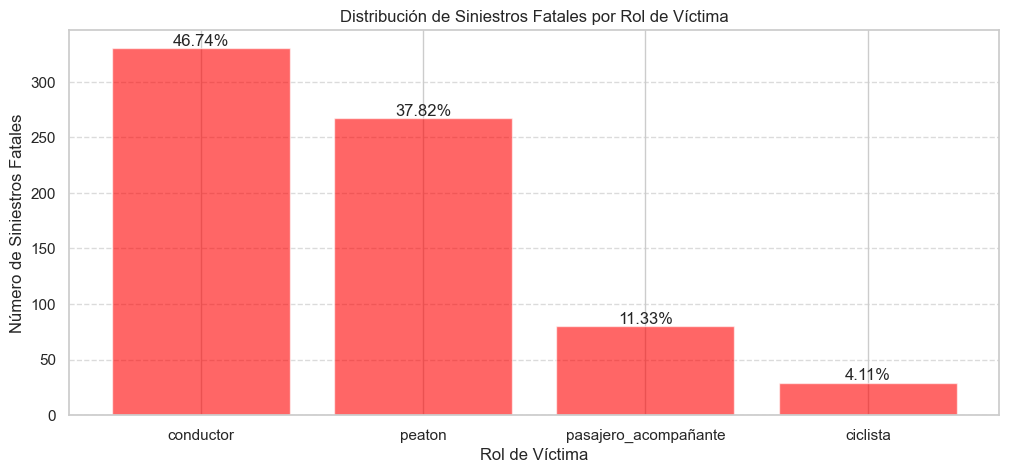

In [32]:
# Filtrar por gravedad igual a 'fatal' y rol no nulo
siniestros_fatal = siniestros_df[(siniestros_df['gravedad'] == 'fatal') & siniestros_df['rol'].notnull()]

# Contar la frecuencia de cada rol
frecuencia_roles = siniestros_fatal['rol'].value_counts()

# Calcular el porcentaje para cada rol
porcentaje_roles = (frecuencia_roles / frecuencia_roles.sum()) * 100

# Crear un gráfico de barras
plt.figure(figsize=(12, 5))
bars = plt.bar(frecuencia_roles.index, frecuencia_roles, color='red', alpha=0.6)

# Alinear las etiquetas del eje x al centro de cada barra
plt.xticks(rotation=0, ha='center')

# Mostrar el porcentaje sobre cada barra
for bar, porcentaje in zip(bars, porcentaje_roles):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{porcentaje:.2f}%',
             ha='center', va='bottom')

plt.title('Distribución de Siniestros Fatales por Rol de Víctima')
plt.xlabel('Rol de Víctima')
plt.ylabel('Número de Siniestros Fatales')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

# Siniestros por Tipo de Vehículo Víctima:

En esta variable tenemos el top 3 para siniestros fatales a las motos, los peatones y los autos. Para el caso de lesionados se repite moto en primer lugar, seguido de autos y ciclistas. El patrón de las otos también está interesante para profundizar.

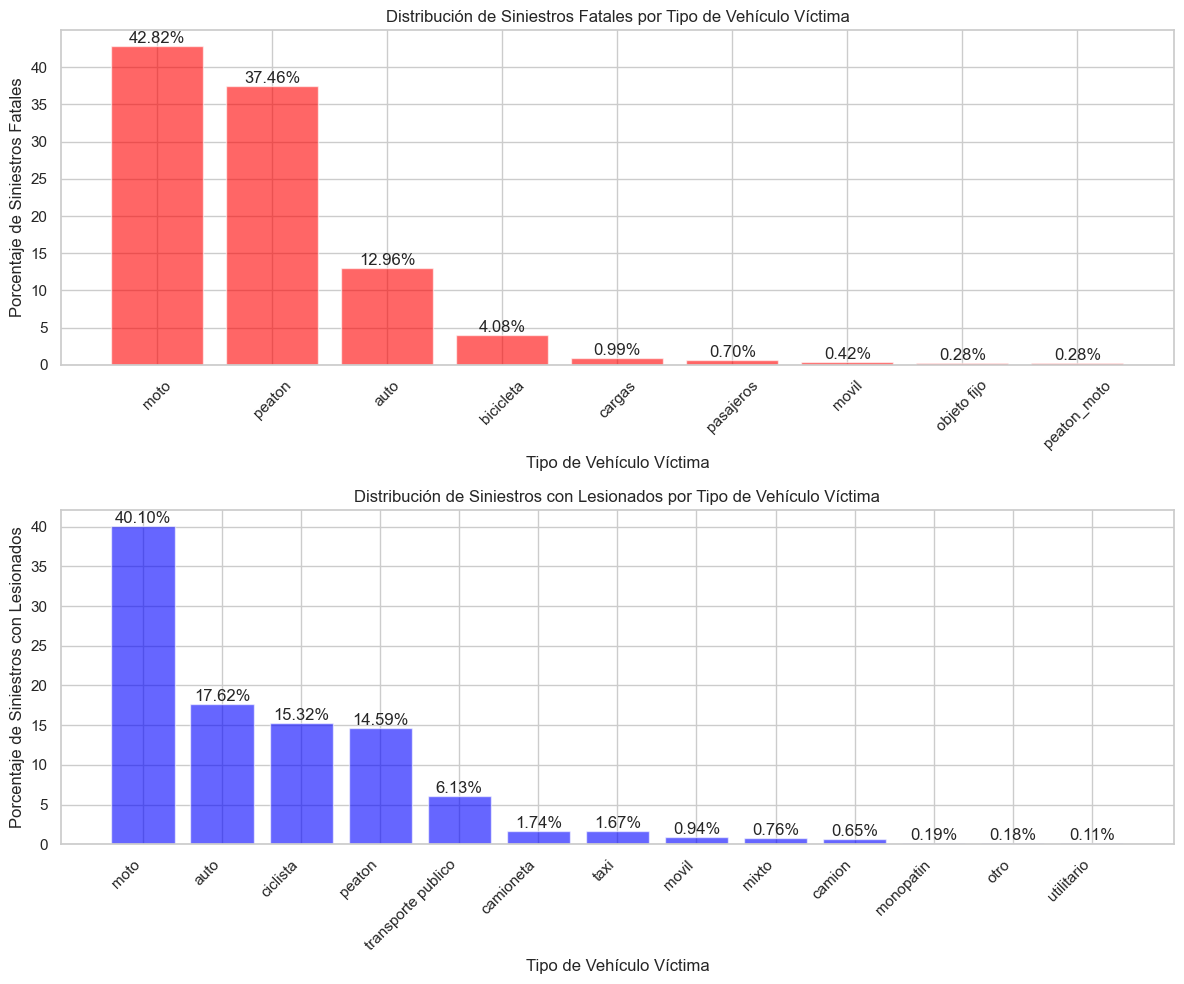

In [33]:
# Filtrar por gravedad igual a 'fatal' y comuna no nula
siniestros_fatal = siniestros_df[(siniestros_df['gravedad'] == 'fatal')]

# Filtrar por gravedad diferente de 'fatal' y comuna no nula
siniestros_lesionados = siniestros_df[(siniestros_df['gravedad'] != 'fatal')]

# Contar la frecuencia de cada tipo de vehículo víctima en siniestros fatales
frecuencia_vehiculo_victima_fatal = siniestros_fatal['vehiculo_victima'].value_counts()

# Contar la frecuencia de cada tipo de vehículo víctima en siniestros con lesionados
frecuencia_vehiculo_victima_lesionados = siniestros_lesionados['vehiculo_victima'].value_counts()

# Calcular los porcentajes
porcentaje_vehiculo_victima_fatal = (frecuencia_vehiculo_victima_fatal / frecuencia_vehiculo_victima_fatal.sum()) * 100
porcentaje_vehiculo_victima_lesionados = (frecuencia_vehiculo_victima_lesionados / frecuencia_vehiculo_victima_lesionados.sum()) * 100

# Filtrar tipos de vehículos con 0.00%
porcentaje_vehiculo_victima_fatal = porcentaje_vehiculo_victima_fatal[porcentaje_vehiculo_victima_fatal > 0]
porcentaje_vehiculo_victima_lesionados = porcentaje_vehiculo_victima_lesionados[porcentaje_vehiculo_victima_lesionados > 0]

# Crear dos gráficos uno debajo del otro
plt.figure(figsize=(12, 10))

# Primer gráfico para vehículos víctima en siniestros fatales
plt.subplot(2, 1, 1)
bars1 = plt.bar(porcentaje_vehiculo_victima_fatal.index, porcentaje_vehiculo_victima_fatal, color='red', alpha=0.6)
plt.title('Distribución de Siniestros Fatales por Tipo de Vehículo Víctima')
plt.xlabel('Tipo de Vehículo Víctima')
plt.ylabel('Porcentaje de Siniestros Fatales')
plt.xticks(rotation=45, ha='center')

# Mostrar porcentaje sobre cada barra
for rect in bars1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}%',
            ha='center', va='bottom')

# Segundo gráfico para vehículos víctima en siniestros con lesionados
plt.subplot(2, 1, 2)
bars2 = plt.bar(porcentaje_vehiculo_victima_lesionados.index, porcentaje_vehiculo_victima_lesionados, color='blue', alpha=0.6)
plt.title('Distribución de Siniestros con Lesionados por Tipo de Vehículo Víctima')
plt.xlabel('Tipo de Vehículo Víctima')
plt.ylabel('Porcentaje de Siniestros con Lesionados')
plt.xticks(rotation=45, ha='right')

# Mostrar porcentaje sobre cada barra
for rect in bars2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}%',
            ha='center', va='bottom')

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()

# Siniestros por Tipo de Vehículo Acusado:

Para el caso de éstos vehiculos en los siniestros fataes, tenemos: autos, pasajeros y carga; mientras que para lesionados nuevamente se repite auto seguido de transporte público y camioneta. Debo acotar que esta es otra de la variables con más nulos en el conjunto de lesionado con un 64.92% de valores faltantes.

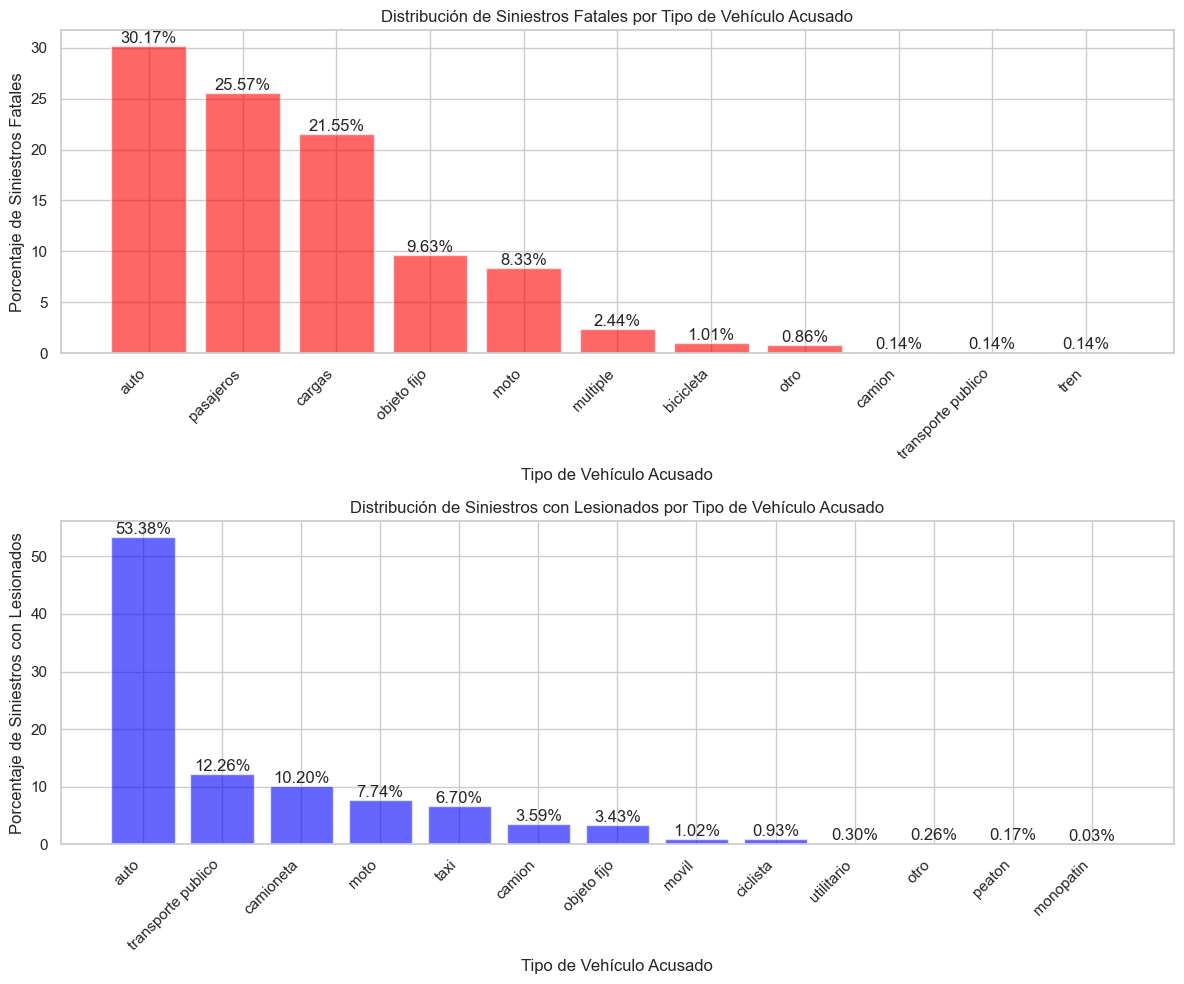

In [34]:
# Filtrar por gravedad igual a 'fatal' y comuna no nula
siniestros_fatal = siniestros_df[(siniestros_df['gravedad'] == 'fatal')]

# Filtrar por gravedad diferente de 'fatal' y comuna no nula
siniestros_lesionados = siniestros_df[(siniestros_df['gravedad'] != 'fatal')]

# Contar la frecuencia de cada tipo de vehículo acusado en siniestros fatales
frecuencia_vehiculo_acusado_fatal = siniestros_fatal['vehiculo_acusado'].value_counts()

# Contar la frecuencia de cada tipo de vehículo acusado en siniestros con lesionados
frecuencia_vehiculo_acusado_lesionados = siniestros_lesionados['vehiculo_acusado'].value_counts()

# Calcular los porcentajes
porcentaje_vehiculo_acusado_fatal = (frecuencia_vehiculo_acusado_fatal / frecuencia_vehiculo_acusado_fatal.sum()) * 100
porcentaje_vehiculo_acusado_lesionados = (frecuencia_vehiculo_acusado_lesionados / frecuencia_vehiculo_acusado_lesionados.sum()) * 100

# Filtrar tipos de vehículos con 0.00%
porcentaje_vehiculo_acusado_fatal = porcentaje_vehiculo_acusado_fatal[porcentaje_vehiculo_acusado_fatal > 0]
porcentaje_vehiculo_acusado_lesionados = porcentaje_vehiculo_acusado_lesionados[porcentaje_vehiculo_acusado_lesionados > 0]

# Crear dos gráficos uno debajo del otro
plt.figure(figsize=(12, 10))

# Primer gráfico para vehículos acusados en siniestros fatales
plt.subplot(2, 1, 1)
bars1 = plt.bar(porcentaje_vehiculo_acusado_fatal.index, porcentaje_vehiculo_acusado_fatal, color='red', alpha=0.6)
plt.title('Distribución de Siniestros Fatales por Tipo de Vehículo Acusado')
plt.xlabel('Tipo de Vehículo Acusado')
plt.ylabel('Porcentaje de Siniestros Fatales')
plt.xticks(rotation=45, ha='right')

# Mostrar porcentaje sobre cada barra
for rect in bars1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}%',
            ha='center', va='bottom')

# Segundo gráfico para vehículos acusados en siniestros con lesionados
plt.subplot(2, 1, 2)
bars2 = plt.bar(porcentaje_vehiculo_acusado_lesionados.index, porcentaje_vehiculo_acusado_lesionados, color='blue', alpha=0.6)
plt.title('Distribución de Siniestros con Lesionados por Tipo de Vehículo Acusado')
plt.xlabel('Tipo de Vehículo Acusado')
plt.ylabel('Porcentaje de Siniestros con Lesionados')
plt.xticks(rotation=45, ha='right')

# Mostrar porcentaje sobre cada barra
for rect in bars2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}%',
            ha='center', va='bottom')

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()


# Siniestro por Género:

Para esta variable en ambos tipos de siniestros la gran mayoría de las víctimas son hombres (masculino) lo que no quiere decir que el porcentaje de mujeres sea menos significativo, sería oportuno corroborrar con la cantidad de licencias de conducir por género para tener una mayor panorama.

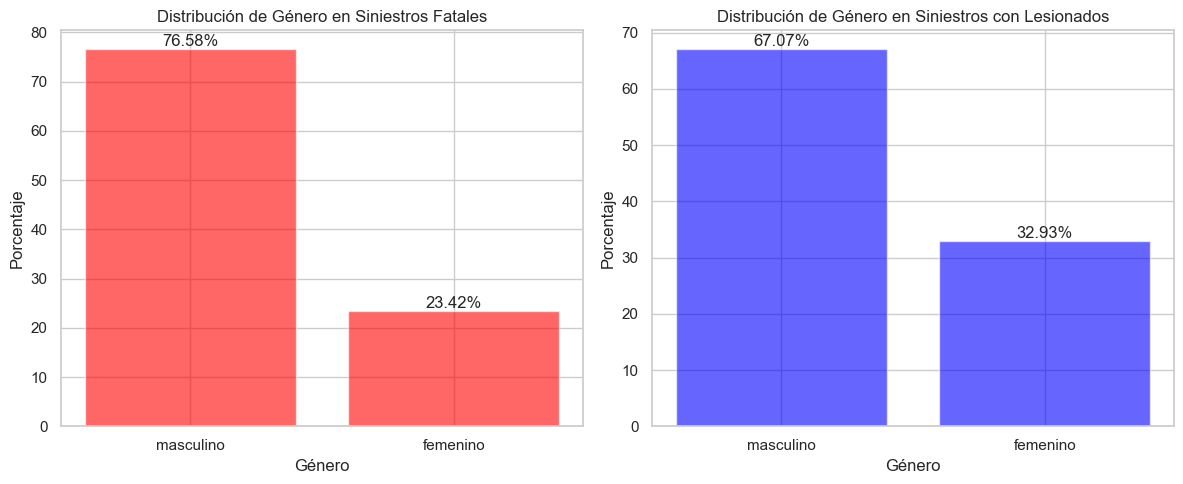

In [35]:
# Filtrar por gravedad igual a 'fatal'
siniestros_fatal = siniestros_df[(siniestros_df['gravedad'] == 'fatal') & siniestros_df['sexo'].notnull()]

# Filtrar por gravedad diferente de 'fatal'
siniestros_lesionados = siniestros_df[(siniestros_df['gravedad'] != 'fatal') & siniestros_df['sexo'].notnull()]

# Contar la frecuencia de cada género en siniestros fatales
frecuencia_genero_fatal = siniestros_fatal['sexo'].value_counts()

# Contar la frecuencia de cada género en siniestros con lesionados
frecuencia_genero_lesionados = siniestros_lesionados['sexo'].value_counts()

# Calcular los porcentajes
porcentaje_genero_fatal = (frecuencia_genero_fatal / frecuencia_genero_fatal.sum()) * 100
porcentaje_genero_lesionados = (frecuencia_genero_lesionados / frecuencia_genero_lesionados.sum()) * 100

# Crear dos gráficos uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer gráfico para siniestros fatales por género
plt.subplot(1, 2, 1)
bars1 = plt.bar(porcentaje_genero_fatal.index, porcentaje_genero_fatal, color='red', alpha=0.6)
plt.title('Distribución de Género en Siniestros Fatales')
plt.xlabel('Género')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0, ha='center')

# Mostrar porcentaje sobre cada barra
for rect in bars1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')

# Segundo gráfico para siniestros con lesionados por género
plt.subplot(1, 2, 2)
bars2 = plt.bar(porcentaje_genero_lesionados.index, porcentaje_genero_lesionados, color='blue', alpha=0.6)
plt.title('Distribución de Género en Siniestros con Lesionados')
plt.xlabel('Género')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0, ha='center')

# Mostrar porcentaje sobre cada barra
for rect in bars2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()

# Siniestro por Edad:

Para ambos casos de siniestro prevalece el rango de víctimas entre los 20 y los 40 años de edad. Es el grupo de personas con la edad más productiva, lo cual estaría bien profundizar.

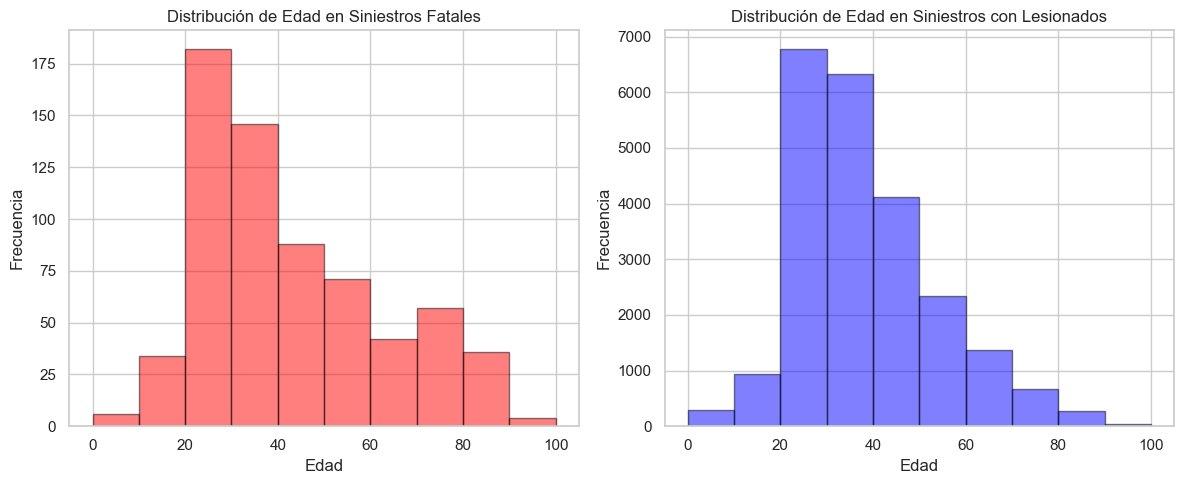

In [36]:
# Filtrar por gravedad igual a 'fatal'
siniestros_fatal = siniestros_df[(siniestros_df['gravedad'] == 'fatal') & siniestros_df['edad'].notnull()]

# Filtrar por gravedad diferente de 'fatal'
siniestros_lesionados = siniestros_df[(siniestros_df['gravedad'] != 'fatal') & siniestros_df['edad'].notnull()]

# Crear dos gráficos uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer gráfico para siniestros fatales por edad
plt.subplot(1, 2, 1)
bins_fatal = range(0, 101, 10)  # Crear bins de 10 en 10 años
plt.hist(siniestros_fatal['edad'], bins=bins_fatal, color='red', alpha=0.5, edgecolor='black')
plt.title('Distribución de Edad en Siniestros Fatales')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Segundo gráfico para siniestros con lesionados por edad
plt.subplot(1, 2, 2)
bins_lesionados = range(0, 101, 10)  # Crear bins de 10 en 10 años
plt.hist(siniestros_lesionados['edad'], bins=bins_lesionados, color='blue', alpha=0.5, edgecolor='black')
plt.title('Distribución de Edad en Siniestros con Lesionados')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()


# Siniestros por Posición Geográfica

Tuvimos algunas limitantes con la librería al parecer por la cantidad de datos. Para hacer posible esta visualización decidimos reducir a un conjunto menor de datos por lo que en el siguiente mapa únicamente se muestra la localización de los siniestros en la comuna que registra la mayor cantidad de víctimas fatales (Comuna 1, con un 12.95% de los siniestros fatales).

In [37]:
# Mapa iterativo

# Filtrar por gravedad igual a 'fatal'
siniestros_fatal = siniestros_df[siniestros_df['gravedad'] == 'fatal']

# Determinar la comuna con mayor siniestros fatales
comuna_max_fatal = siniestros_fatal['comuna'].value_counts().idxmax()

# Filtrar por la comuna con mayor siniestros fatales
siniestros_comuna_max_fatal = siniestros_fatal[siniestros_fatal['comuna'] == comuna_max_fatal]

# Eliminar filas con datos nulos en longitud y latitud
siniestros_geograficos = siniestros_comuna_max_fatal.dropna(subset=['longitud', 'latitud'])



